In [1]:
from PIL import Image, ImageDraw

In [2]:
%load_ext autoreload
%autoreload 2
import dart_board

r = dart_board.score((2, 2), (0,0), 2.9)
print('score', r)

score (8, 'd4')


In [3]:
dartboard_filename = 'dart_board.png'

In [4]:
dartboard_image = Image.open(dartboard_filename)
dartboard_image

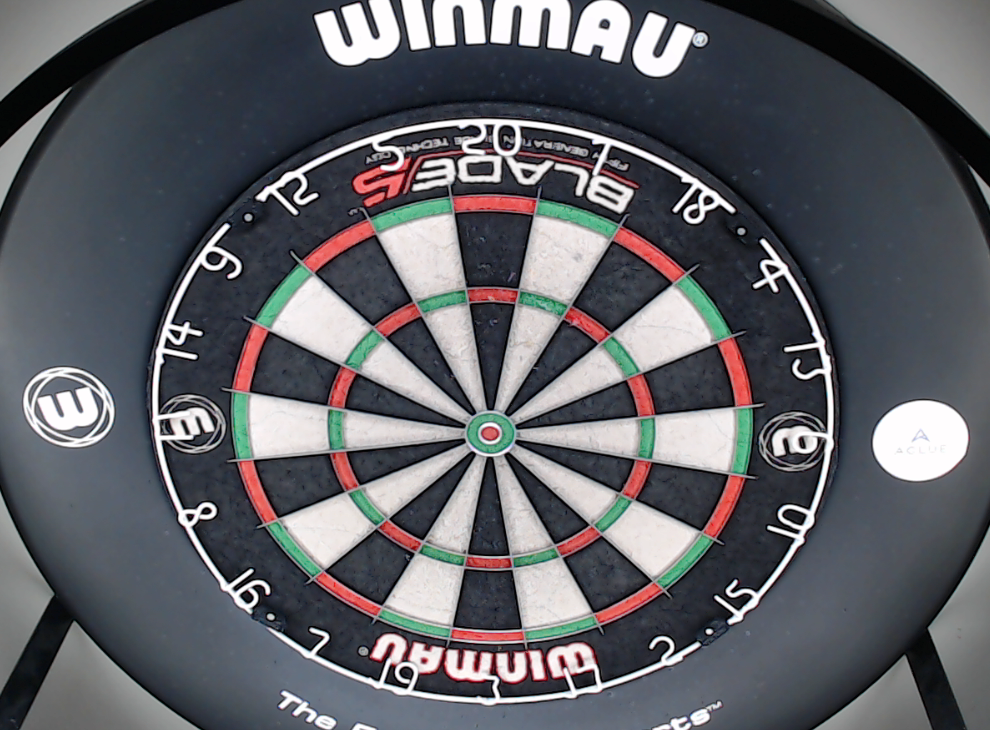

In [5]:
width, height = dartboard_image.size
left = 450
top = 350
right = width - 480
bottom = height
cropped = dartboard_image.crop((left, top, right, bottom))
cropped.save('dart_board_cropped.png')
cropped

In [6]:
# draw x on image at position (x, y) with thickness t, color c, and length l
def draw_x_at(img, pos, t=2, c='blue', l=10):
    x, y = pos
    copy = img.copy()
    draw = ImageDraw.Draw(copy)
    draw.line((x-l, y-l, x+l, y+l), fill=c, width=t)
    draw.line((x-l, y+l, x+l, y-l), fill=c, width=t)
    return copy

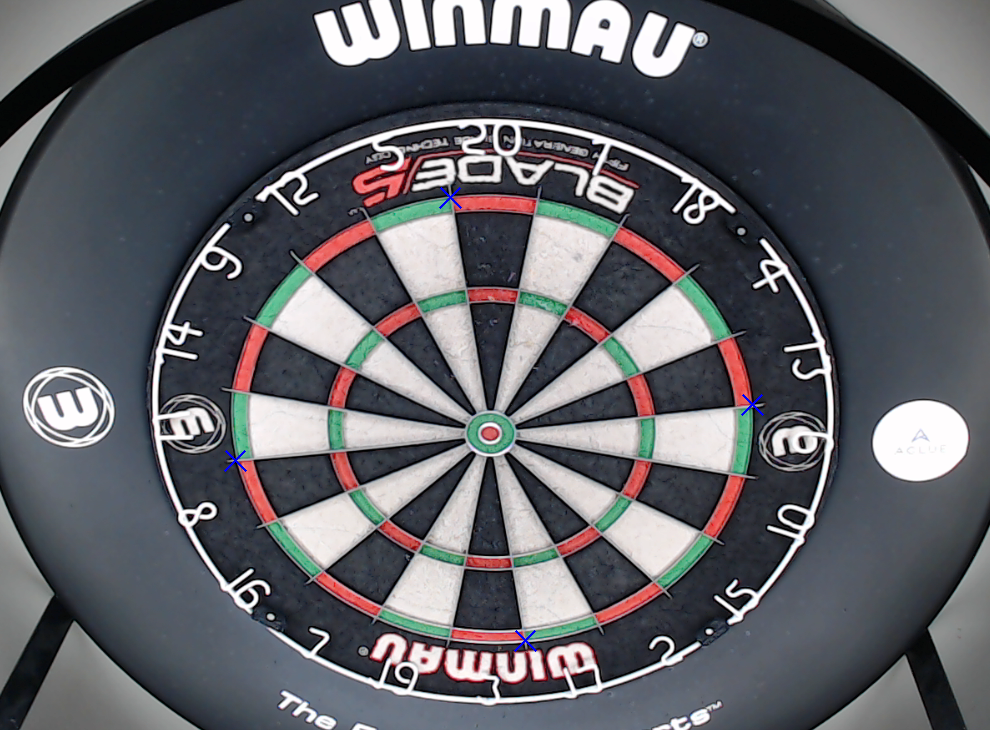

In [7]:
cropped_with_anchors = cropped.copy()

top_anchor = (450, 197)
left_anchor = (235, 460)
right_anchor = (752, 404)
bottom_anchor = (525, 640)

cropped_with_anchors = draw_x_at(cropped_with_anchors, top_anchor)
cropped_with_anchors = draw_x_at(cropped_with_anchors, left_anchor)
cropped_with_anchors = draw_x_at(cropped_with_anchors, right_anchor)
cropped_with_anchors = draw_x_at(cropped_with_anchors, bottom_anchor)

# show image with anchors
from IPython.display import display
display(cropped_with_anchors)

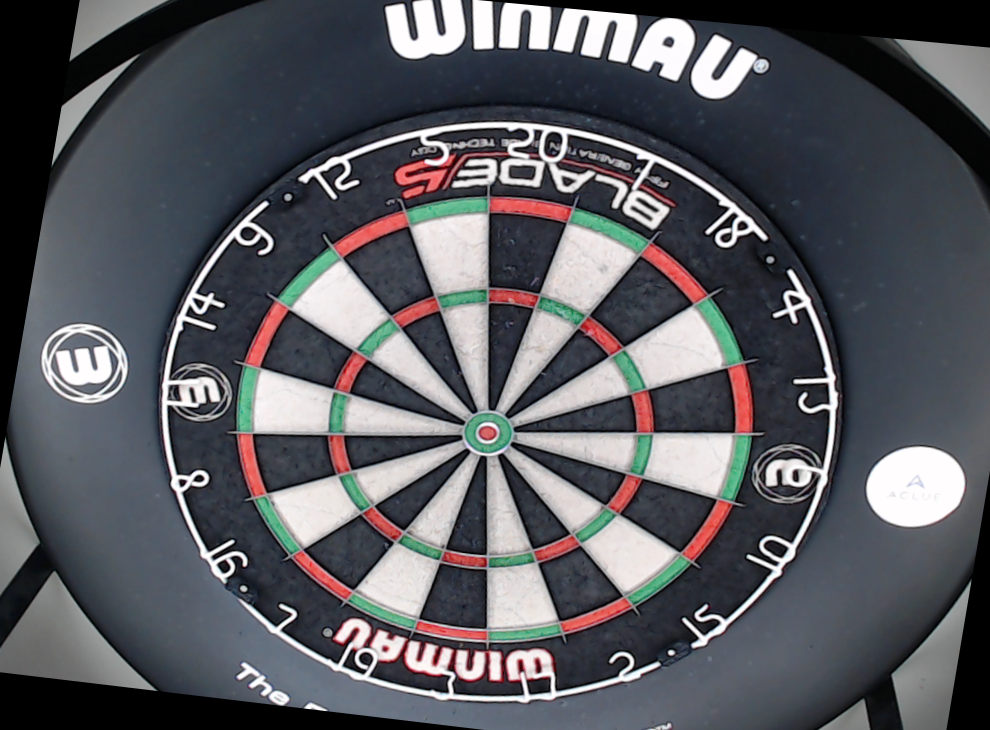

In [8]:
# destinations for anchors
middle_x = (top_anchor[0] + bottom_anchor[0]) / 2
middle_y = (left_anchor[1] + right_anchor[1]) / 2

top_anchor_dest = (middle_x, top_anchor[1])
left_anchor_dest = (left_anchor[0], middle_y)
right_anchor_dest = (right_anchor[0], middle_y)
bottom_anchor_dest = (middle_x, bottom_anchor[1])
"""
top_left = (0,0)
top_right = (cropped.width, 0)
bottom_left = (0, cropped.height)
bottom_right = (cropped.width, cropped.height)
"""


import cv2
import numpy as np

src_img = cropped.copy()

src_points = [top_anchor, left_anchor, right_anchor, bottom_anchor]
dst_points = [top_anchor_dest, left_anchor_dest, right_anchor_dest, bottom_anchor_dest]

H, _ = cv2.findHomography(np.array(src_points), np.array(dst_points))

# Define the input image as a NumPy array
input_image_arr = np.array(src_img)

# Define the output size
output_size = (src_img.width, src_img.height)

# Apply the homography to the input image using warpPerspective
output_image_arr = cv2.warpPerspective(input_image_arr, H, output_size)

# Convert the output image back to a Pillow Image object
output_image = Image.fromarray(output_image_arr)
output_image.save('dart_board_cropped_transformed.png')
output_image



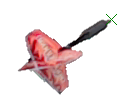

In [9]:
dart_1 = Image.open('dart_1.png')

# draw green x at dart top
def pos_to_lines(pos, line_length):
    x, y = pos
    return [
        ((x - line_length / 2, y - line_length / 2), (x + line_length / 2, y + line_length / 2)),
        ((x + line_length / 2, y - line_length / 2), (x - line_length / 2, y + line_length / 2))
    ]

line_length = 10
line_width = 1
pos_1 = (111, 19)

line_1, line_2 = pos_to_lines(pos_1, line_length)

dart_1_draw = ImageDraw.Draw(dart_1)
dart_1_draw.line(line_1, fill='green', width=line_width)
dart_1_draw.line(line_2, fill='green', width=line_width)
dart_1

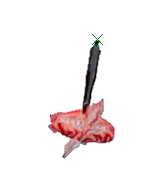

In [10]:
dart_2 = Image.open('dart_2.png')

pos_2 = (97, 39)
line_1, line_2 = pos_to_lines(pos_2, line_length)

dart_2_draw = ImageDraw.Draw(dart_2)
dart_2_draw.line(line_1, fill='green', width=line_width)
dart_2_draw.line(line_2, fill='green', width=line_width)
#dart_2_draw.line(((0,0), (0, dart_2.size[1])), fill='green', width=line_width)

dart_2

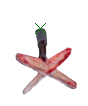

In [17]:
dart_3 = Image.open('dart_3.png')

pos_3 = (40, 28)
line_1, line_2 = pos_to_lines(pos_3, line_length)

dart_3_draw = ImageDraw.Draw(dart_3)
dart_3_draw.line(line_1, fill='green', width=line_width)
dart_3_draw.line(line_2, fill='green', width=line_width)

dart_3

In [12]:
def composite_at(background, foreground, pos):
    if background.mode != 'RGBA':
        background = background.convert('RGBA')

    tmp_img = Image.new('RGBA', background.size, (0, 0, 0, 0))
    tmp_img.paste(foreground, pos)
    return Image.alpha_composite(background, tmp_img)

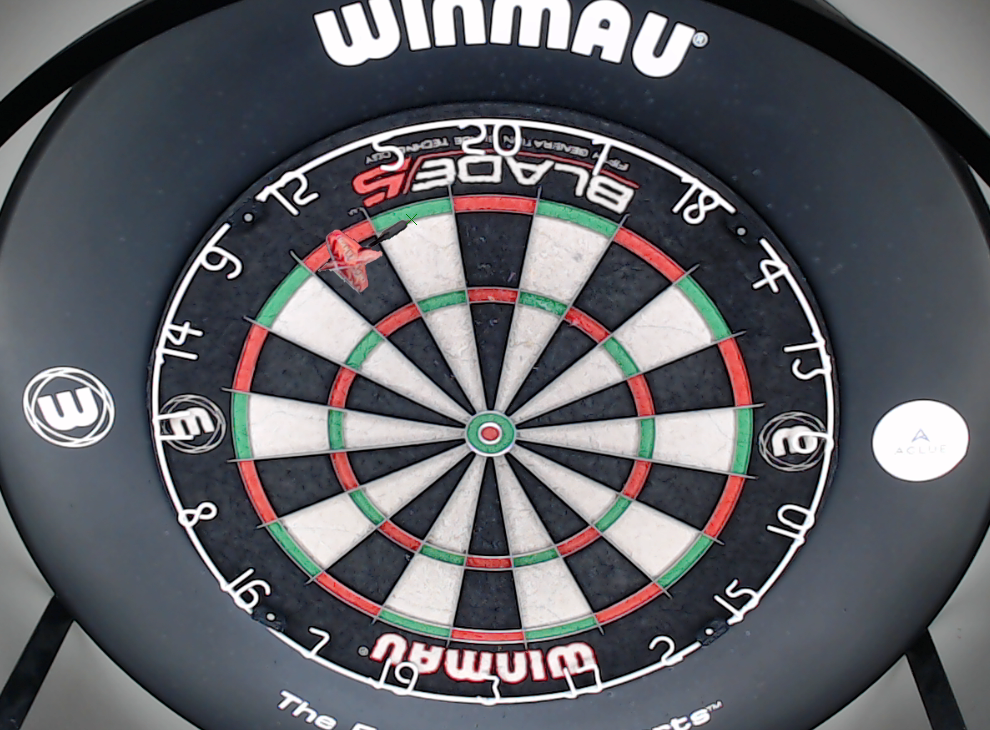

In [13]:
composite = composite_at(cropped, dart_1, (300, 200))
composite

In [14]:
def dart_position_in_cropped(pasted_at_pos, dart_top_pos):
    return (pasted_at_pos[0] + dart_top_pos[0], pasted_at_pos[1] + dart_top_pos[1])

def dart_position_in_original(cropped_at_pos, pasted_at_pos, dart_top_pos):
    return (cropped_at_pos[0] + pasted_at_pos[0] + dart_top_pos[0], cropped_at_pos[1] + pasted_at_pos[1] + dart_top_pos[1])

In [15]:
###
### generate data
###
import random
import csv

def random_positions(start_pos, end_pos):
    positions = []
    for i in range(3):
        x = random.randint(start_pos[0], end_pos[0])
        y = random.randint(start_pos[1], end_pos[1])
        positions.append((x, y))
    return positions

def cluster_positions_at_double():
    pass
def cluster_positions_at_triple():
    pass

save_location = 'data/'

num_images = 10
start_pos = (20, 20)
end_pos = cropped.size[0] - 20, cropped.size[1] - 20

dart_images = [dart_1, dart_2, dart_3]
dart_top_positions = [pos_1, pos_2, pos_3]


positions = []
for i in range(num_images):
    img_pos_1, img_pos_2, img_pos_3 = random_positions(start_pos, end_pos)

    dart_idx = random.randint(0, len(dart_images) - 1)
    dart_1 = dart_images[dart_idx]
    dart_1_top_pos = dart_top_positions[dart_idx]
    composite_1 = composite_at(cropped, dart_1, img_pos_1)

    dart_idx = random.randint(0, len(dart_images) - 1)
    dart_2 = dart_images[dart_idx]
    dart_2_top_pos = dart_top_positions[dart_idx]
    composite_2 = composite_at(composite_1, dart_2, img_pos_2)

    dart_idx = random.randint(0, len(dart_images) - 1)
    dart_3 = dart_images[dart_idx]
    dart_3_top_pos = dart_top_positions[dart_idx]
    composite_3 = composite_at(composite_2, dart_3, img_pos_3)
    
    dart_1_pos_in_cropped = dart_position_in_cropped(img_pos_1, dart_1_top_pos)
    dart_2_pos_in_cropped = dart_position_in_cropped(img_pos_2, dart_2_top_pos)
    dart_3_pos_in_cropped = dart_position_in_cropped(img_pos_3, dart_3_top_pos)
    positions.append((dart_1_pos_in_cropped, dart_2_pos_in_cropped, dart_3_pos_in_cropped))

    print(f'pos_1: {img_pos_1}, pos_2: {img_pos_2}, pos_3: {img_pos_3}')

    # save images as pngs
    composite_1.save(f'{save_location}dart_{i}_1.png')
    composite_2.save(f'{save_location}dart_{i}_2.png')
    composite_3.save(f'{save_location}dart_{i}_3.png')

with open(f'{save_location}positions.txt', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['dart_1', 'dart_2', 'dart_3'])
    for pos in positions:
        writer.writerow(pos)

pos_1: (203, 331), pos_2: (857, 225), pos_3: (613, 575)
pos_1: (869, 457), pos_2: (832, 672), pos_3: (29, 510)
pos_1: (324, 296), pos_2: (561, 315), pos_3: (658, 314)
pos_1: (852, 261), pos_2: (340, 359), pos_3: (245, 710)
pos_1: (167, 647), pos_2: (191, 406), pos_3: (296, 137)
pos_1: (678, 333), pos_2: (327, 615), pos_3: (21, 424)
pos_1: (567, 534), pos_2: (308, 601), pos_3: (924, 171)
pos_1: (314, 38), pos_2: (576, 675), pos_3: (219, 510)
pos_1: (475, 627), pos_2: (736, 147), pos_3: (124, 216)
pos_1: (420, 313), pos_2: (566, 173), pos_3: (138, 507)
